<a href="https://colab.research.google.com/github/MihikaSatpathy/Analysis-of-SuperStore-Data/blob/analysis/Analysis_of_superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libs:


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

# Reading the dataset:

In [ ]:
df=pd.read_csv("/content/SampleSuperstore.csv")
print("Read Data successfully.")

Read Data successfully.


# Understanding the dataset

In [ ]:
df.info()
print("The dimensions are: ",df.shape)
df.head(7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
The dimensions are:  (9994, 13)


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656


# Data cleansing

In [ ]:
Missing_data = df.isnull()
Missing_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
Missing_data.sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [ ]:
#Identify features with missing values:
features = [feature for feature in Missing_data.sum()>0]

In [ ]:
print("No missing values in the dataframe.")

No missing values in the dataframe.


# Removing Duplicates

In [ ]:
print("Shape before removing the duplicates:", df.shape)
dk = df.drop_duplicates()
if(df.shape == dk.shape):
  print("No duplicates")
else:
  print("Shape after removing the duplicates:", dk.shape)
  df = dk
  print("Dataframe updated", df.shape)


Shape before removing the duplicates: (9977, 13)
No duplicates


# Descriptive Statistics

In [ ]:
df_stats = df.drop(['Postal Code'], axis=1)
df_stats.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


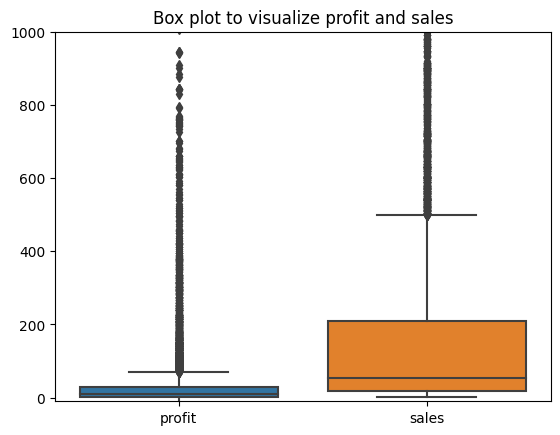

In [ ]:
#use a box plot to visualize profit and sales:
ax=sb.boxplot(data=[df_stats['Profit'], df_stats['Sales']])
plt. ylim(-10,1000)
plt.xticks([0,1],["profit","sales"])
plt.title("Box plot to visualize profit and sales")
plt.show()

# Grouping by sub-category to understand each item's sales and profit:

In [ ]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [ ]:
df_groupBysubC = df.groupby([df['Sub-Category']], as_index=False).mean()
df_groupBysubC.drop(['Postal Code'], axis=1, inplace=True)
df_groupBysubC.head(10)

<ipython-input-64-c14d2d046eae>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupBysubC = df.groupby([df['Sub-Category']], as_index=False).mean()


,Sub-Category,Sales,Quantity,Discount,Profit
0,Accessories,215.974604,3.840000,0.078452,54.111788
1,Appliances,230.755710,3.710300,0.166524,38.922758
2,Art,34.096896,3.768553,0.074969,8.207059
3,Binders,133.645972,3.923127,0.372011,19.860710
4,Bookcases,503.859633,3.807018,0.211140,-15.230509
5,Chairs,532.971969,3.822764,0.170244,43.198582
6,Copiers,2198.941618,3.441176,0.161765,817.909190
7,Envelopes,64.867724,3.566929,0.080315,27.418019
8,Fasteners,13.936774,4.211982,0.082028,4.375660
9,Furnishings,95.902745,3.723849,0.138494,13.653476


# Relation between sub-category and their avg sales:

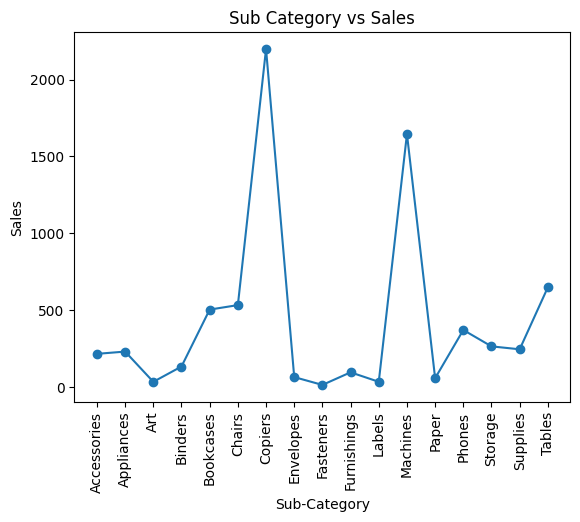

In [ ]:
plt.plot(df_groupBysubC['Sub-Category'], df_groupBysubC['Sales'], marker='o')
plt.xticks(rotation = 90)
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.title("Sub Category vs Sales")
plt.show()

In [ ]:
print("Copiers has highest avg sales")


Copiers has highest avg sales


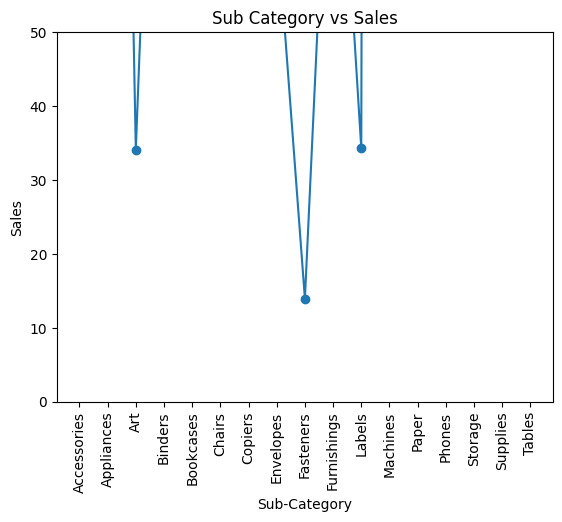

In [ ]:
plt.plot(df_groupBysubC['Sub-Category'], df_groupBysubC['Sales'], marker='o')
plt.xticks(rotation = 90)
plt.xlabel("Sub-Category")
plt.ylabel("Sales")
plt.title("Sub Category vs Sales")
plt.ylim(0,50)
plt.show()

In [ ]:
#The above graph shows Fasteners have the lowest average Sales.
print("Fasteners have the lowest average Sales")

Fasteners have the lowest average Sales


# Correlation between sales and profit:

In [ ]:
pearson_cof , p_val = stats.pearsonr(df['Sales'],df['Profit'])
print("Person coefficient:",pearson_cof,"  P_value:", p_val)

Person coefficient: 0.4790673141382176   P_value: 0.0


<Axes: xlabel='Sales', ylabel='Profit'>

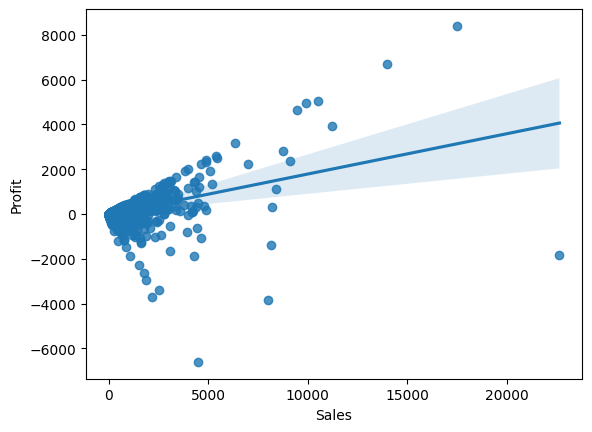

In [ ]:
sb.regplot(x = df['Sales'], y=df['Profit'], data=df)

In [ ]:
print("There is Moderate Positive correlation between Sales and Price")

There is Moderate Positive correlation between Sales and Price


In [ ]:
print("Therefore we can conclude that increase in sales indicates increase in price and vice versa is also true.")

Therefore we can conclude that increase in sales indicates increase in price and vice versa is also true.


# Finding the state that makes the maximum profit:

In [ ]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

In [ ]:
df_groupByState =  df.groupby([df['State']], as_index=False).mean()
df_groupByState.drop(['Postal Code'], axis=1, inplace=True)
df_groupByState.head(3)


<ipython-input-130-3f062610904f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupByState =  df.groupby([df['State']], as_index=False).mean()


,State,Sales,Quantity,Discount,Profit
0,Alabama,319.846557,4.196721,0.000000,94.865989
1,Arizona,157.508933,3.848214,0.303571,-15.303235
2,Arkansas,194.635500,4.000000,0.000000,66.811452


In [ ]:
df_groupByState.tail(2)

,State,Sales,Quantity,Discount,Profit
47,Wisconsin,291.951,4.209091,0.0,76.380004
48,Wyoming,1603.136,4.000000,0.2,100.196000


1603.136


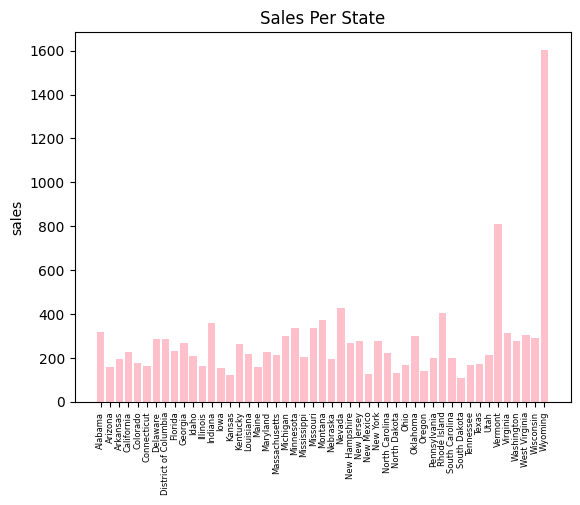

In [ ]:
Sales_max= s=df_groupByState['Sales'].max()
print(Sales_max)
plt.bar(df_groupByState['State'], df_groupByState['Sales'], color="pink")
plt.xticks(rotation=90, fontsize=6)
plt.ylabel("sales")
plt.title("Sales Per State")
plt.show()

**State that has Max Sales**

In [ ]:
print("max sales is in Wyoming")

max sales is in Wyoming


# Visualizing Sales w.r.t State

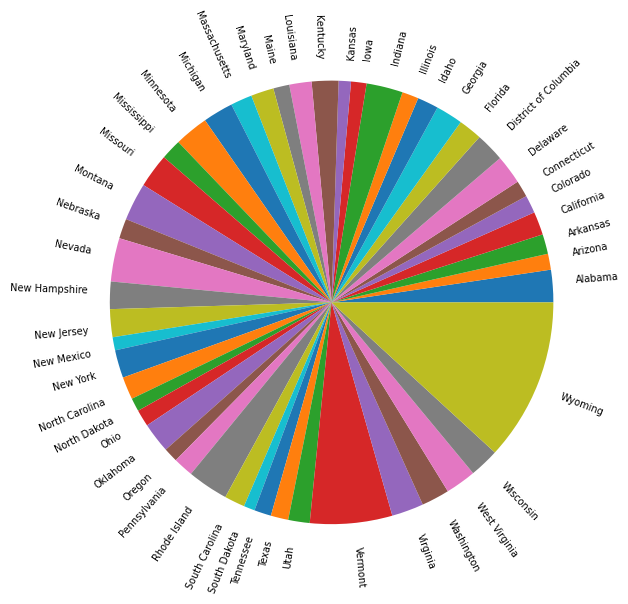

In [ ]:
#pie plot:
plt.pie(df_groupByState['Sales'], labels=df_groupByState['State'],radius=1.5, rotatelabels=True, textprops={"fontsize":7})
plt.show()

# Top 10 Cities that have most profit

In [ ]:
cities_profit = pd.DataFrame(df.groupby('City')['Profit'].sum())
cities_profit.reset_index(inplace=True)
cities_profit = cities_profit.sort_values( by="Profit",ascending=False)
cities_profit.head(10)

,City,Profit
329,New York City,62013.8973
266,Los Angeles,30431.4267
452,Seattle,29121.6825
438,San Francisco,17466.1186
123,Detroit,13146.6935
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


# Finding the most profitable region:

In [ ]:
df['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [ ]:
reg_info = df.groupby('Region').sum()

<ipython-input-164-3adc9718a2ac>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reg_info = df.groupby('Region').sum()


In [ ]:
reg_info

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,151523188,500782.8528,8768,557.14,39655.8752
East,50099338,678435.1960,10609,413.50,91506.3092
South,55875052,391721.9050,6209,238.55,46749.4303
West,292783499,725255.6365,12234,350.00,108329.8079


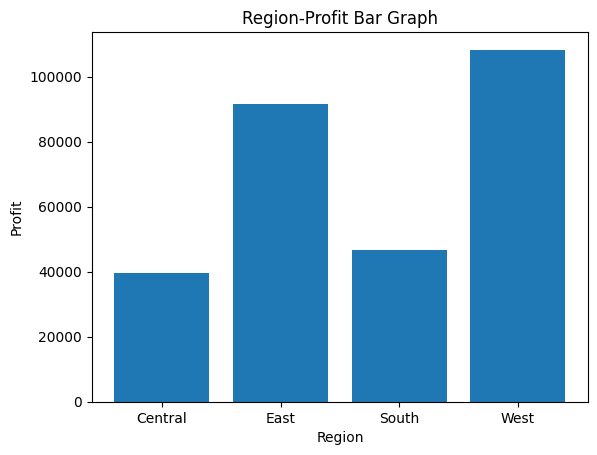

In [ ]:
plt.bar(reg_info.index, reg_info['Profit'])
plt.xticks(reg_info.index)
plt.xlabel("Region")
plt.ylabel("Profit")
plt.title("Region-Profit Bar Graph")
plt.show()